In [22]:
import numpy as np
import pandas as pd
from PIL import Image, ImageOps
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

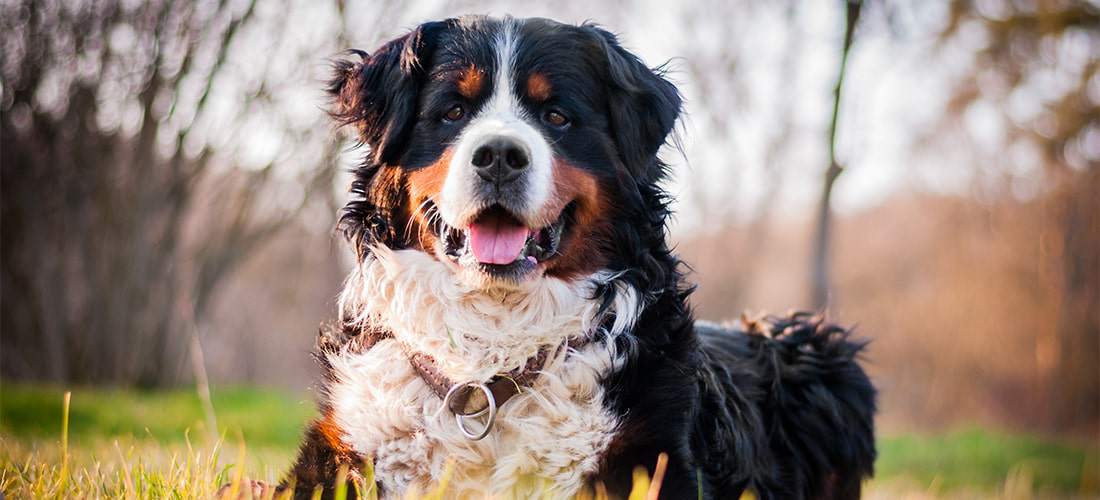

In [23]:
dog_breeds = ["bernese_mountain_dog", "border_collie",
          "chihuahua", "corgi", "dachshund",
          "golden_retriever", "jack_russell","labrador",
          "pug", "siberian_husky"]

file_path="/nobackup/gogandhi/alt_means_sans_k/data/dog_breed_data"
dog_images = {}
for dog_breed in dog_breeds:
    image_list = []
    breed_path = os.path.join(file_path, dog_breed)
    
    for file in os.listdir(breed_path):
        # Check if the file is an image (you can extend the list of valid extensions)
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            im = Image.open(os.path.join(breed_path, file))
            image_list.append(im)
    
    dog_images[dog_breed] = image_list
    
display(random.choice(dog_images[random.choice(dog_breeds)]))

In [24]:
for i in dog_images.values():
    for j in range(len(i)):
        width, height = i[j].size
        if width == height:
            i[j] = i[j].resize((256,256), Image.LANCZOS)
        else:
            if width > height:
                left = width/2 - height/2
                right = width/2 + height/2
                top = 0
                bottom = height
                i[j] = i[j].crop((left,top,right,bottom))
                i[j] = i[j].resize((256,256), Image.LANCZOS)
            else:
                left = 0
                right = width
                top = 0
                bottom = width
                i[j] = i[j].crop((left,top,right,bottom))
                i[j] = i[j].resize((256,256), Image.LANCZOS)

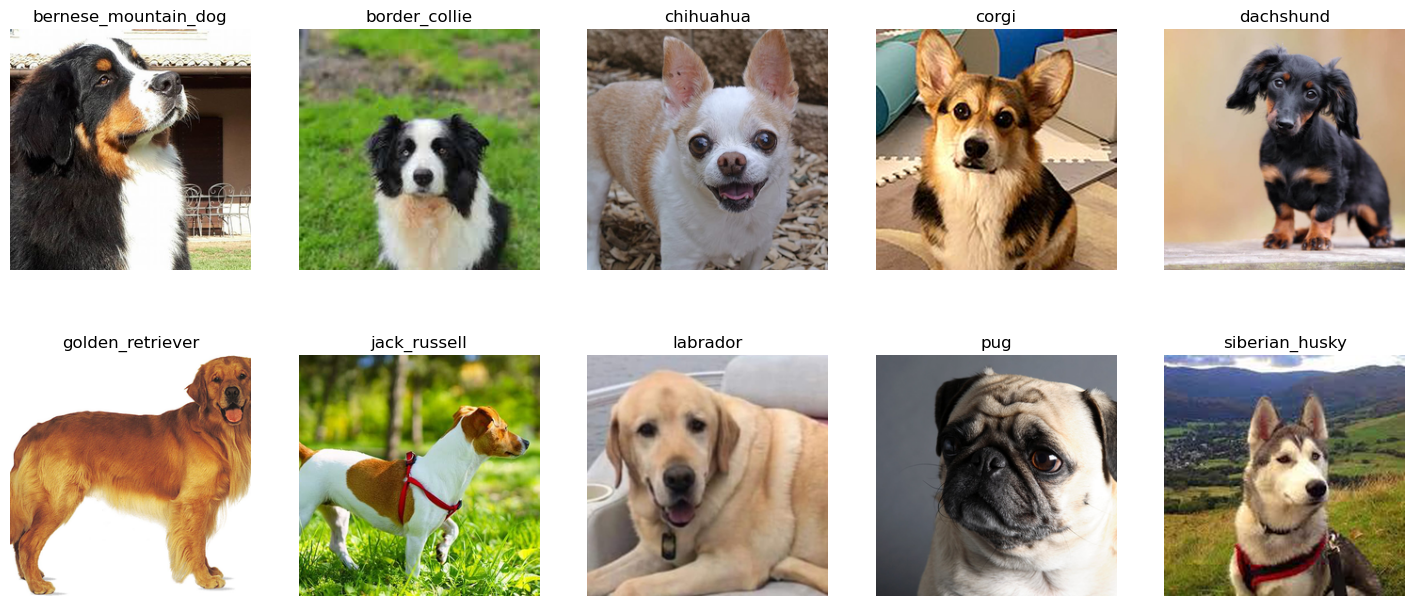

In [27]:
images = []
for i in dog_images.values():
    images.append(random.choice(i))

height = max(8, int(len(images)/5) * 8)
plt.figure(figsize=(18, 12))

for i, image in enumerate(images):
    plt.subplot(len(images) // 5 + 1, 5, i + 1)
    plt.imshow(image)
    plt.title(dog_breeds[i])
    plt.axis('off')



Note that I have cropped the photo, but not made sure all the photos have the face of the dog well in the frame. If the results flop, I will do this better